In [309]:
# We start with downloading necessary libraries in building the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [310]:
# load the data
data = pd.read_csv(r"C:\Users\User\Desktop\House price\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [311]:
# what kind of information we have in the data
data.info(), data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None, (1460, 81))

C:\Users\User\AppData\Local\Temp\ipykernel_12772\2995897065.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


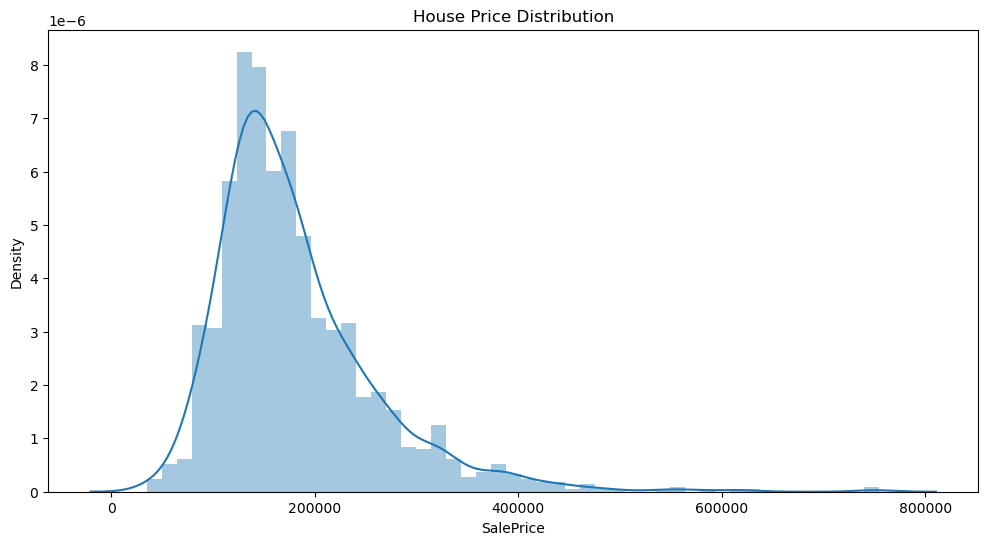

In [312]:
# house price distribution
plt.figure(figsize=(12,6))
sns.distplot(data['SalePrice'])
plt.title('House Price Distribution')
plt.show()



In [313]:
#  install necessary library to convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder  
label_encoder= LabelEncoder() 

In [314]:
# function to convert all categorical data to numerical data and create a new  num_data frame
def convert_categorical_to_numerical(data):
    num_data = data.copy()
    for col in data.columns:
        if data[col].dtype == 'object':
            num_data[col] = label_encoder.fit_transform(data[col].astype(str))
        else:
            continue
    return num_data

num_data = convert_categorical_to_numerical(data)
num_data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [315]:
#checking correlation matrix with SalePrice column on numerical data
correlation = num_data.corr()
correlation['SalePrice'].sort_values(ascending=False)
# print all columns with correlation greater than 0.5
correlation['SalePrice'][correlation['SalePrice']>0.5].sort_values(ascending=False)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

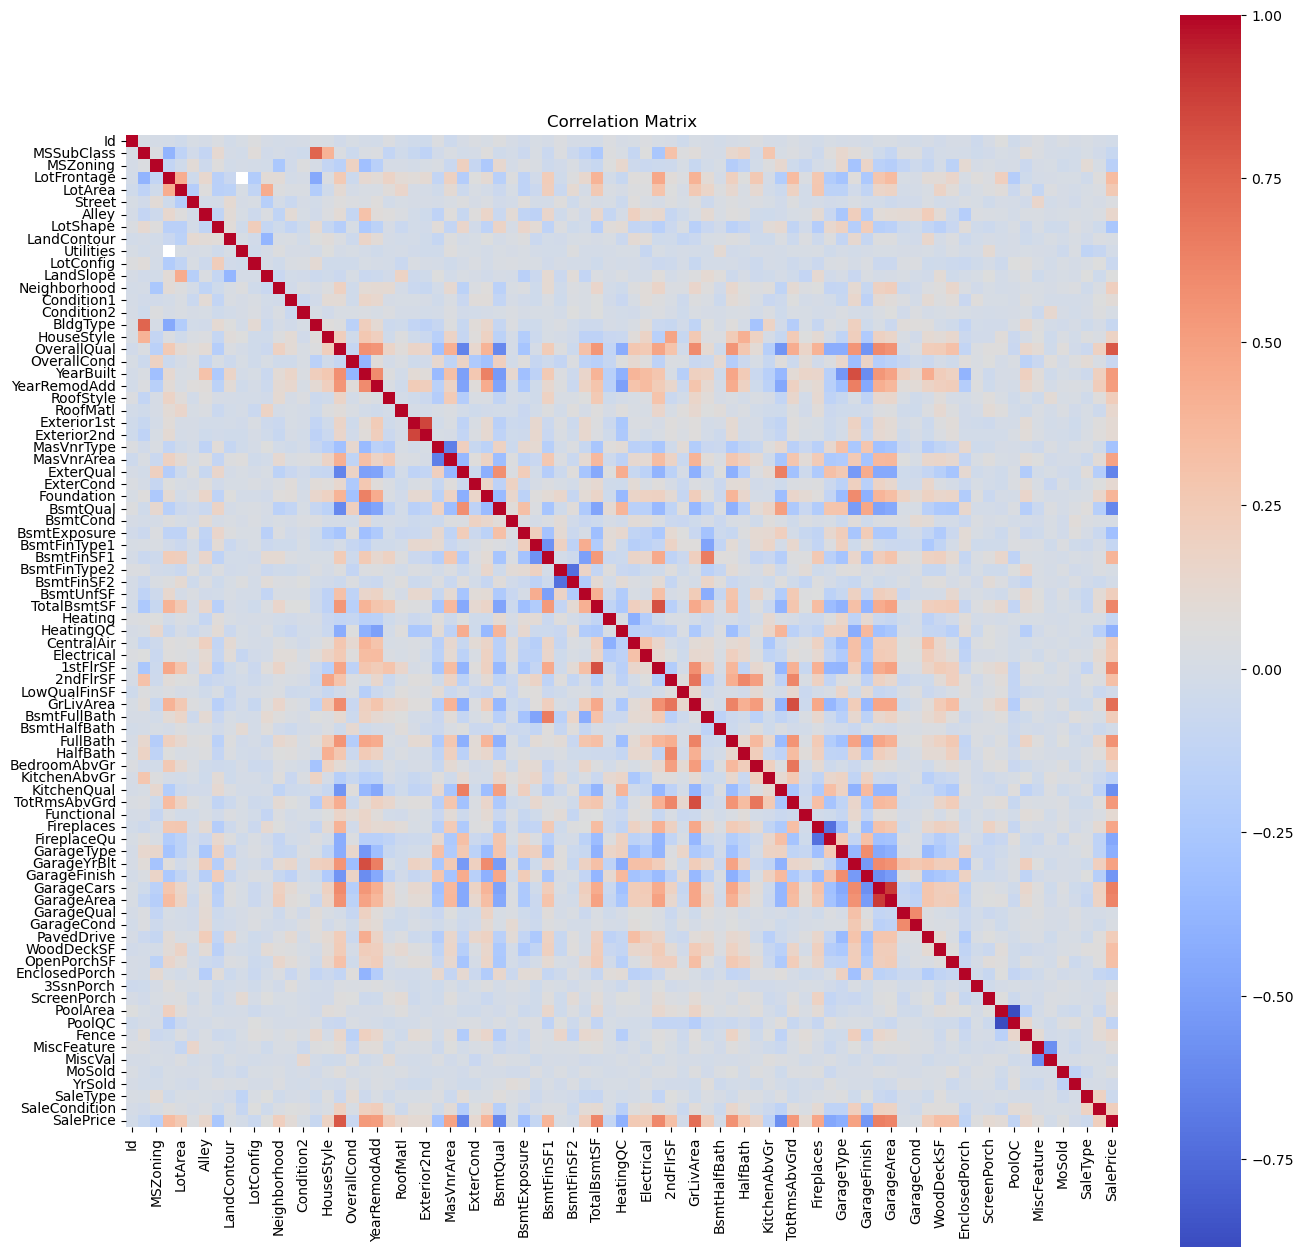

In [316]:
#make heatmap of the correlation matrix with SalePrice column
plt.figure(figsize=(16,16))
sns.heatmap(correlation, square=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [317]:
# print all column names with correlation less than 0.5
correlation['SalePrice'][correlation['SalePrice']<0.5].sort_values(ascending=False)

GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
                  ...   
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, Length: 70, dtype: float64

In [318]:
# remove columns with correlation less than 0.5 and make a new dataframe with less columns
columns = correlation['SalePrice'][correlation['SalePrice']>0.5].index
new_data = num_data[columns]
new_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


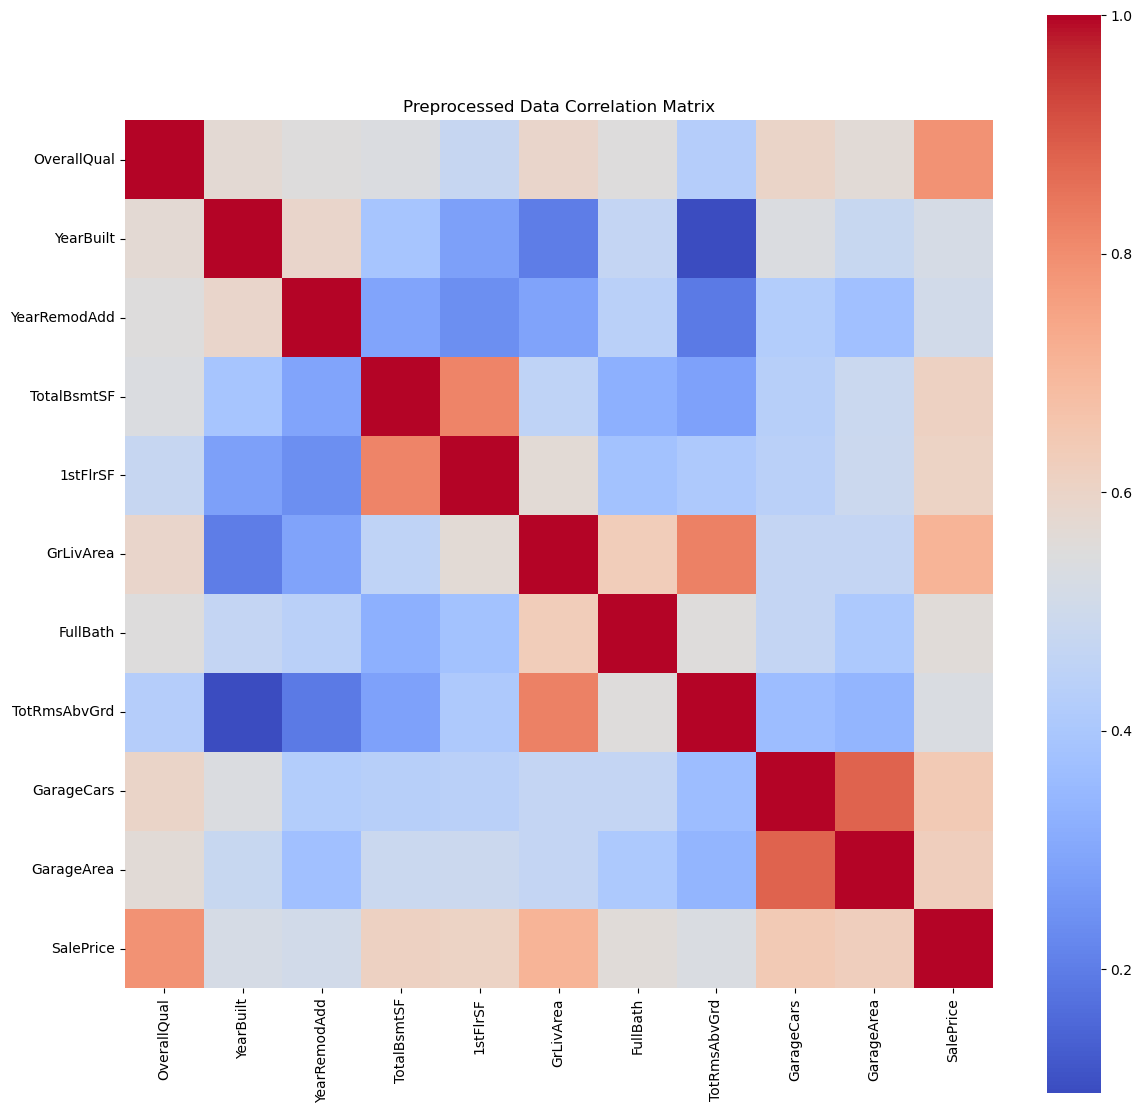

In [319]:
# visualize with heatmap our pre processed data
plt.figure(figsize=(14,14))
sns.heatmap(new_data.corr(), square=True, cmap='coolwarm')
plt.title('Preprocessed Data Correlation Matrix')
plt.show()

Prepare to training

In [320]:
# split the data into X and Y data train and test splits
X = new_data.drop('SalePrice', axis=1)
Y = new_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [321]:
# function to process through standardizing the data
from sklearn.preprocessing import StandardScaler

def standardize_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [322]:
# standardize the data
X_train = standardize_data(X_train) 
X_test = standardize_data(X_test)

In [323]:
# function to process through training the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [324]:
# function to handle missing values 
from sklearn.impute import SimpleImputer
def handle_missing_values(X):
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)
    return X

In [325]:
# function to train the model 
def train_model(X_train, Y_train):
    model = RandomForestRegressor()
    model.fit(X_train, Y_train)
    return model

In [326]:
#handle missing values
X_train = handle_missing_values(X_train)

In [327]:
# train the model
model = train_model(X_train, Y_train)

In [328]:
# check metrics of the model accuracy
X_test = handle_missing_values(X_test)  

Y_pred = model.predict(X_test)

rmse = root_mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 30885.839758768012
R2 Score: 0.875633047169434


In [329]:
# test the model with a test data
test_data = pd.read_csv(r"C:\Users\User\Desktop\House price\test.csv")
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [332]:
# apply all the processing steps to test data
num_test_data = convert_categorical_to_numerical(test_data)
test_data = num_test_data[columns.drop('SalePrice')]
test_data = handle_missing_values(test_data)
test_data = standardize_data(test_data)


In [333]:
# predict the house price
predictions = model.predict(test_data)
predictions

array([124969.66, 153729.  , 170135.55, ..., 139911.03, 119367.6 ,
       227528.7 ])

In [334]:
# open sample_submission file and replace the SalePrice column with our predictions
sample_submission = pd.read_csv(r"C:\Users\User\Desktop\House price\sample_submission.csv")
sample_submission['SalePrice'] = predictions
sample_submission.head()

,Id,SalePrice
0,1461,124969.66
1,1462,153729.00
2,1463,170135.55
3,1464,184092.00
4,1465,226596.92


In [335]:
# save the predictions to a csv file
sample_submission.to_csv('House_Price_Predictions.csv', index=False)
